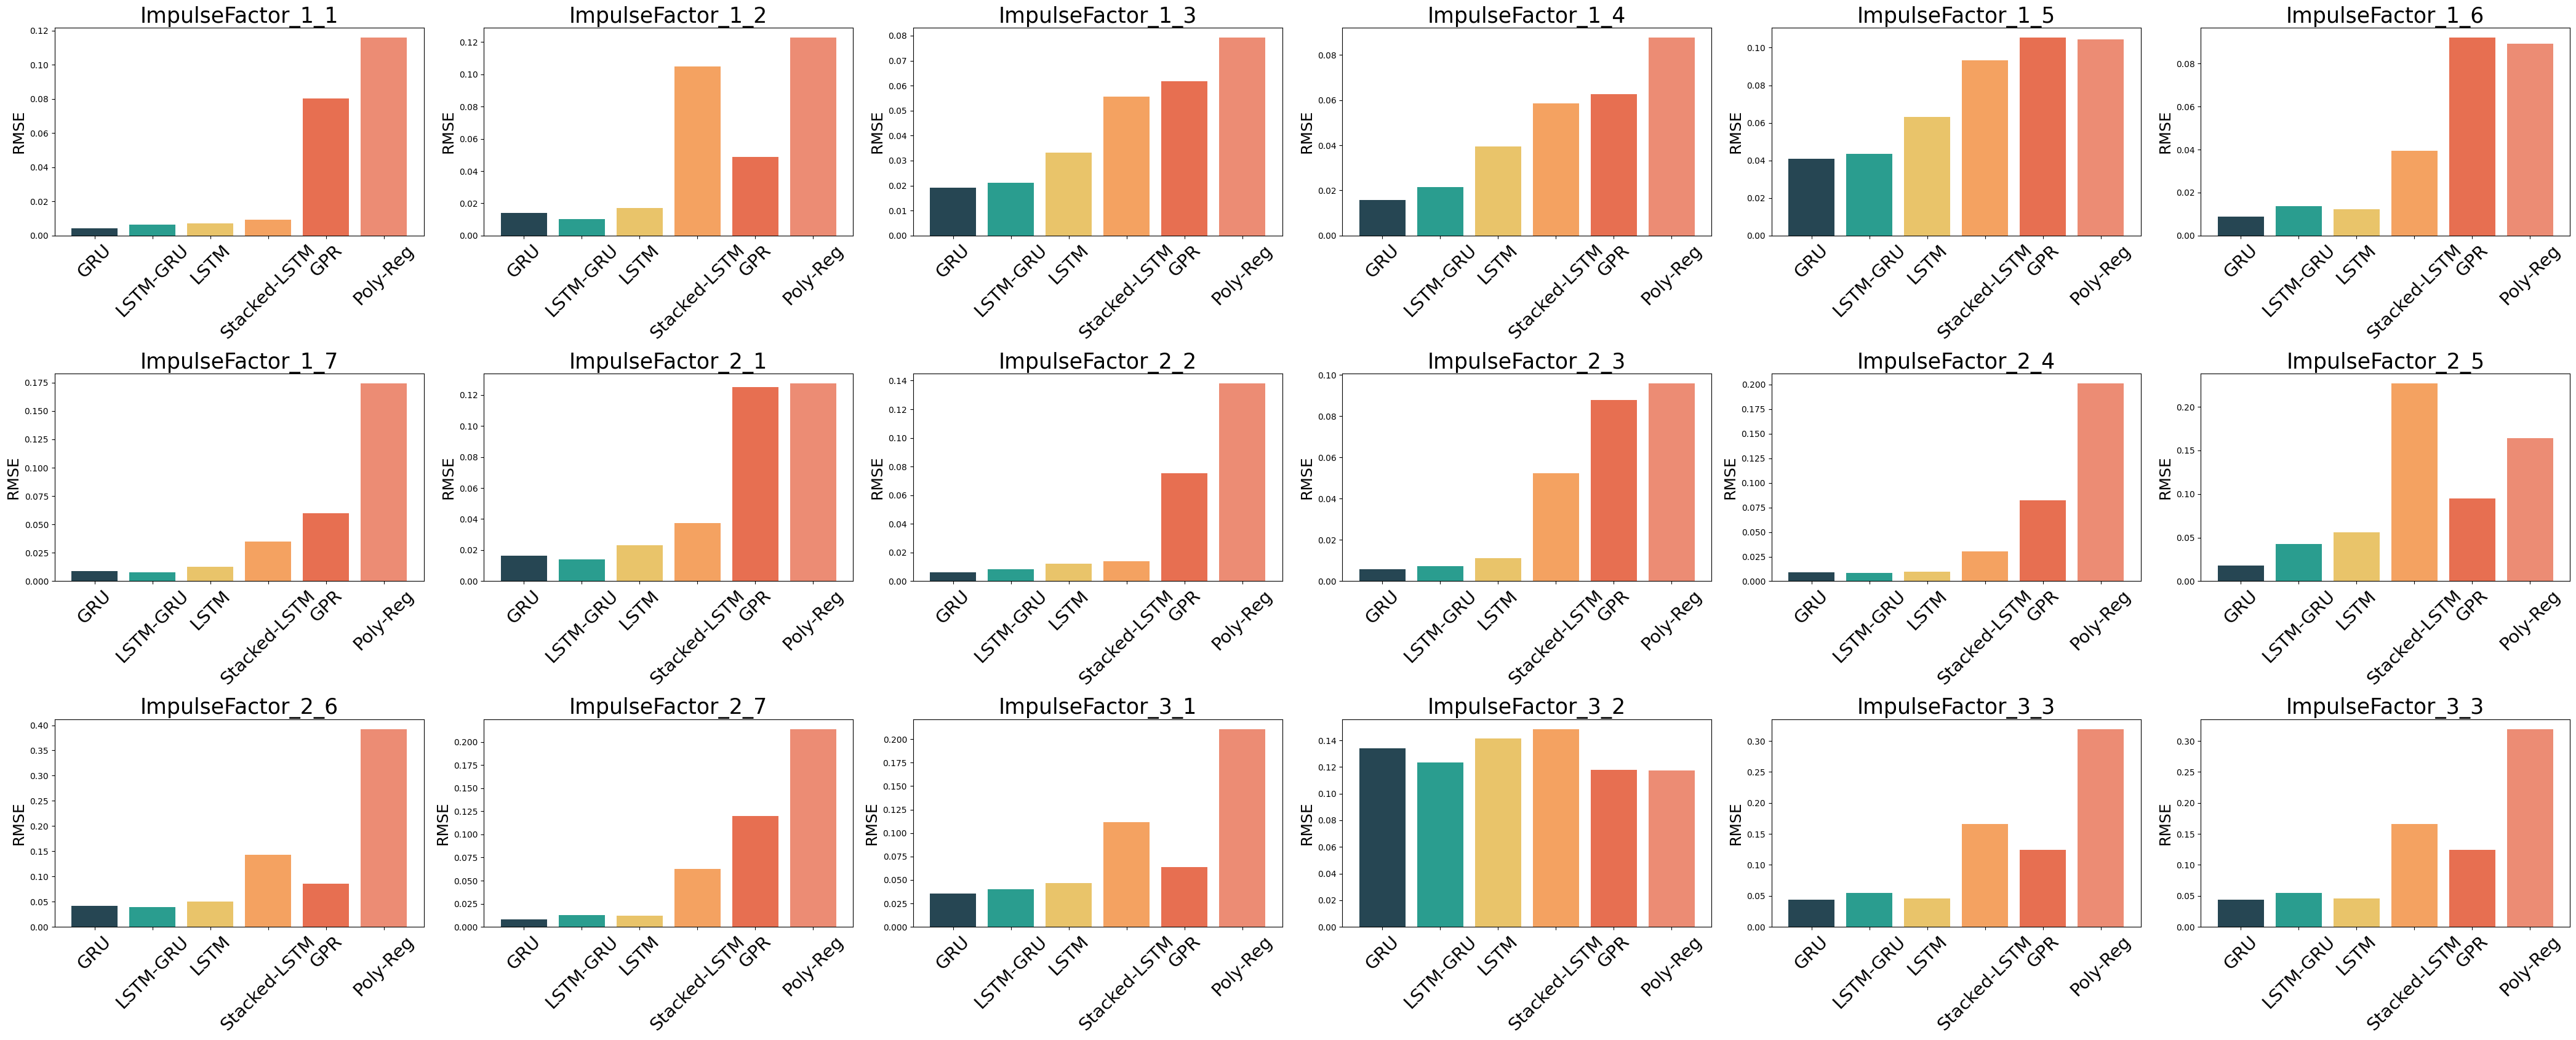

In [94]:
import json
import matplotlib.pyplot as plt

# Load JSON data for each model
Poly_Reg_Logistic_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json") as json_file:
    Poly_Reg_Logistic_dat = json.load(json_file)

GPR_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json") as json_file:
    GPR_dat = json.load(json_file)

LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json") as json_file:
    LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json") as json_file:
    Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json") as json_file:
    GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json") as json_file:
    LSTM_GRU_dat = json.load(json_file)

# Function to get the max/min metric score across data splits
def getMetricScore(source: list, score: str, method: str = 'max'):
    """
    source: list containing performance data
    score: the metric to consider ('R2', 'MAE', etc.)
    method: 'max' to return maximum value, 'min' to return minimum value
    """
    dat = []
    for x in source:
        splits = list(x.values())[0]  # Retrieve the dictionary for each bearing
        values = [split[score] for split in splits]  # Get the values for different splits
        if method == 'max':
            dat.append(max(values))
        elif method == 'min':
            dat.append(min(values))
        elif method == 'avg':
            dat.append(np.mean(values))
    return dat

import numpy as np

# Prepare bearing IDs and configuration
bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
bearing_ids = sorted(bearing_ids)
config = "nrmse"  # Metric to evaluate ('R2', 'MAE', etc.)
method = 'min'  # Select 'max' or 'min' to plot the best metric across splits

# Get R2 for 25% training split (max/min across splits)
r2_best_perc = {
    'GRU': getMetricScore(GRU_dat, config, method),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config, method),
    'LSTM': getMetricScore(LSTM_dat, config, method),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config, method),
    'GPR_Logistic': getMetricScore(GPR_dat, config, method),
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config, method),
}

# Plot the results
fig, axes = plt.subplots(3, 6, figsize=(42, 1 * len(bearing_ids)))

min_val, max_val = min(np.array([i for i in r2_best_perc.values()]).flatten()), max(np.array([i for i in r2_best_perc.values()]).flatten())

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, len(bearing_ids) - 1)
        # if(bearing_ids[index].split("_")[1] != "1"): continue

        # Sort models by performance metric (R²)
        keys = list(r2_best_perc.keys())
        values = [d[index] for d in r2_best_perc.values()]
        # zipped = zip(keys, values)
        # sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=(method == 'max'))
        # keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        custom_colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#ec8c74']
        ax.bar(keys, values, color=custom_colors)
        # ax.set_ylim(min_val, max_val)
        ax.set_xticks(range(len(keys)))
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45, size=21)
        ax.set_title(bearing_ids[index], size=25)
        ax.set_ylabel('RMSE', size=18)

plt.tight_layout()
plt.show()


In [70]:
r2_best_perc["GPR_Logistic"]

[0.08030655309141303,
 0.048607695895770964,
 0.06186737578324365,
 0.06267662357440715,
 0.10524788300865379,
 0.0920422109640084,
 0.0599915680086195,
 0.1250988563170474,
 0.07529569587105435,
 0.08773083838991186,
 0.08250458150721637,
 0.0946378798289887,
 0.08598842098673429,
 0.12003245731642247,
 0.06400596194347659,
 0.11781007460195854,
 0.12452948818294794]

In [71]:
import pandas as pd
x = r2_best_perc
df = pd.DataFrame(x) #, index = [""]*len(x)) #.to_clipboard()
print(df)

         GRU  LSTM-GRU      LSTM  Stacked-LSTM  GPR_Logistic  \
0   0.004227  0.006336  0.007301      0.009439      0.080307   
1   0.013937  0.010194  0.017032      0.105052      0.048608   
2   0.019260  0.021130  0.033129      0.055551      0.061867   
3   0.015776  0.021450  0.039592      0.058634      0.062677   
4   0.040841  0.043527  0.063175      0.093232      0.105248   
5   0.008701  0.013718  0.012190      0.039554      0.092042   
6   0.008839  0.008030  0.012840      0.035197      0.059992   
7   0.016506  0.014136  0.023307      0.037485      0.125099   
8   0.006197  0.008151  0.012126      0.013957      0.075296   
9   0.005898  0.007384  0.011170      0.052230      0.087731   
10  0.008872  0.008157  0.009656      0.030157      0.082505   
11  0.018028  0.043022  0.056281      0.226790      0.094638   
12  0.041508  0.039655  0.050758      0.142947      0.085988   
13  0.008002  0.012902  0.012023      0.062892      0.120032   
14  0.035620  0.039788  0.046826      0.

In [72]:
def compute_score(percent_error):
    if percent_error <= 0:  # Late predictions
        return np.exp(-np.log(0.5) * (percent_error / 5))
    else:  # Early predictions
        return np.exp(np.log(0.5) * (percent_error / 20))

In [73]:
model = "GRU"
print(compute_score(np.mean([x for x in df[model].values[0:7] if x > -100])))
print(compute_score(np.mean([x for x in df[model].values[7:14] if x > -100])))
print(compute_score(np.mean([x for x in df[model].values[14:] if x > -100])))

0.999447711084378
0.9994802188120495
0.9975334024637083


In [79]:
model = "GRU"
print(np.mean([x for x in df[model].values[0:7] if x > -100]))
print(np.mean([x for x in df[model].values[7:14] if x > -100]))
print(np.mean([x for x in df[model].values[14:] if x > -100]))

0.01594009176740123
0.015001613960273972
0.07125888033236866
